## General Exploratory Data Analysi

## General Exploratory Data Analysi

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os.path
from datetime import datetime
from datetime import date
from dateutil import parser
#import pickle
#import asyncio
from datetime import timedelta
import dateutil.parser
import imp
import json
import statistics
#import random

#from binance.client import Client

#import api
#import get_uptodate_binance_data
#import generate_random_file
#import track_pnl

In [128]:
%%time

filename = 'BTCUSDT-1h-binance.csv'
timeframe = '1h'
OHLC_directory = '/root/OResearch/Data/Binance_OHLC/'
complete_file_path = OHLC_directory + filename
df = pd.read_csv(complete_file_path)

CPU times: user 49.5 ms, sys: 0 ns, total: 49.5 ms
Wall time: 70.3 ms


In [129]:
df = df.drop(columns=['Unnamed: 0'], axis=0)

Adding log-return

In [130]:
df['closeprice_log_return']=np.log(df.close) - np.log(df.close.shift(1))
df = df.iloc[1: , :] #Remove first row which contains NA due to log-return

In [132]:
df['datetime'] = pd.to_datetime(df['timestamp'], errors='coerce')
df['day'] = df['datetime'].dt.day_name()
df['week'] = df['datetime'].dt.week
df['month'] = df['datetime'].dt.month_name()

In [141]:
df

,timestamp,open,high,low,close,volume,time_diff_in_days,time_diff_in_min,closeprice_log_return,datetime,day,week,month
1,2017-08-17 05:00:00.000,4308.83,4328.69,4291.37,4315.32,23.234916,0.0,60.0,0.001505,2017-08-17 05:00:00,Thursday,33,August
2,2017-08-17 06:00:00.000,4330.29,4345.45,4309.37,4324.35,7.229691,0.0,60.0,0.002090,2017-08-17 06:00:00,Thursday,33,August
3,2017-08-17 07:00:00.000,4316.62,4349.99,4287.41,4349.99,4.443249,0.0,60.0,0.005912,2017-08-17 07:00:00,Thursday,33,August
4,2017-08-17 08:00:00.000,4333.32,4377.85,4333.32,4360.69,0.972807,0.0,60.0,0.002457,2017-08-17 08:00:00,Thursday,33,August
5,2017-08-17 09:00:00.000,4360.00,4445.78,4360.00,4444.00,10.763623,0.0,60.0,0.018925,2017-08-17 09:00:00,Thursday,33,August
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34576,2021-08-01 20:00:00,41263.34,41500.00,41106.00,41258.65,2076.843599,0.0,60.0,-0.000114,2021-08-01 20:00:00,Sunday,30,August
34577,2021-08-01 21:00:00,41258.65,41314.14,40926.09,41068.21,1139.681274,0.0,60.0,-0.004626,2021-08-01 21:00:00,Sunday,30,August
34578,2021-08-01 22:00:00,41068.21,41192.60,40000.00,40268.63,4849.500775,0.0,60.0,-0.019662,2021-08-01 22:00:00,Sunday,30,August
34579,2021-08-01 23:00:00,40273.36,40437.51,39422.01,39845.44,5041.730461,0.0,60.0,-0.010565,2021-08-01 23:00:00,Sunday,30,August


# We plot the average and median log_return by day, by week, and by month.

# by day

In [162]:
days=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

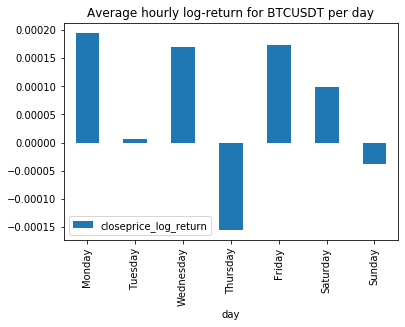

In [206]:
fig = df[['day', 'closeprice_log_return']].groupby('day', sort=True).mean().reindex(days).plot(kind='bar', title='Average hourly log-return for BTCUSDT per day', legend=True).get_figure()
fig.savefig('Images/Average hourly log-return for BTCUSDT per day.png')

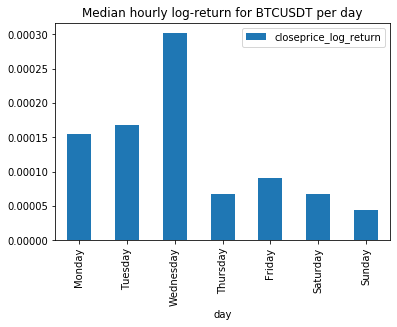

In [200]:
fig = df[['day', 'closeprice_log_return']].groupby('day', sort=False).median().reindex(days).plot(kind='bar', title='Median hourly log-return for BTCUSDT per day', legend=True).get_figure()
fig.savefig('Images/Median hourly log-return for BTCUSDT per day.png')

# by week

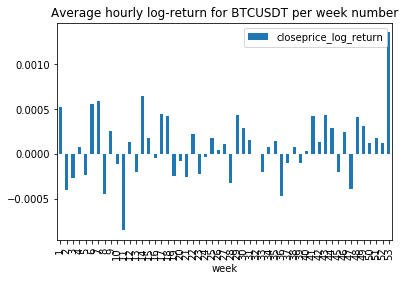

In [201]:
fig = df[['week', 'closeprice_log_return']].groupby('week', sort=True).mean().plot(kind='bar', title='Average hourly log-return for BTCUSDT per week number', legend=True).get_figure()
fig.savefig('Images/Average hourly log-return for BTCUSDT per week number.png')

We can notice quite a pattern on the 53th calendar week. Explain more. (cause 53th week only exists in 2020 so it's biased: not big enough sample

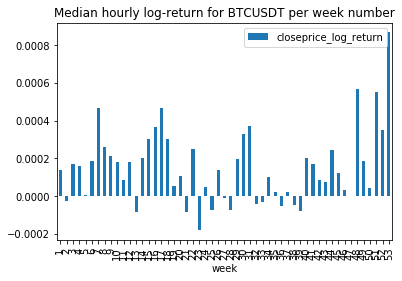

In [203]:
fig = df[['week', 'closeprice_log_return']].groupby('week').median().plot(kind='bar', title='Median hourly log-return for BTCUSDT per week number', legend=True).get_figure()
fig.savefig('Images/Median hourly log-return for BTCUSDT per week number.png')

Let's now look at extreme value or outliers among those

# by month

In [170]:
months=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

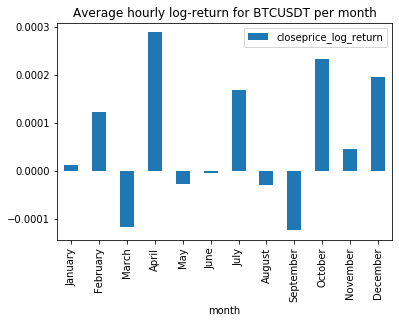

In [204]:
fig = df[['month', 'closeprice_log_return']].groupby('month', sort=False).mean().reindex(months).plot(kind='bar', title='Average hourly log-return for BTCUSDT per month', legend=True).get_figure()
fig.savefig('Images/Average hourly log-return for BTCUSDT per month.png')

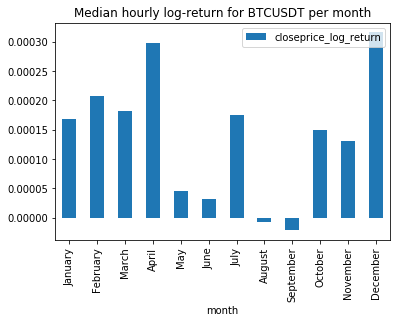

In [205]:
fig = df[['month', 'closeprice_log_return']].groupby('month').median().reindex(months).plot(kind='bar', title='Median hourly log-return for BTCUSDT per month', legend=True).get_figure()
fig.savefig('Images/Median hourly log-return for BTCUSDT per month.png')